<a href="https://colab.research.google.com/github/Sachin-143-sree/DSC_ASSIGNMENT/blob/main/DSC_212_IMS24201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

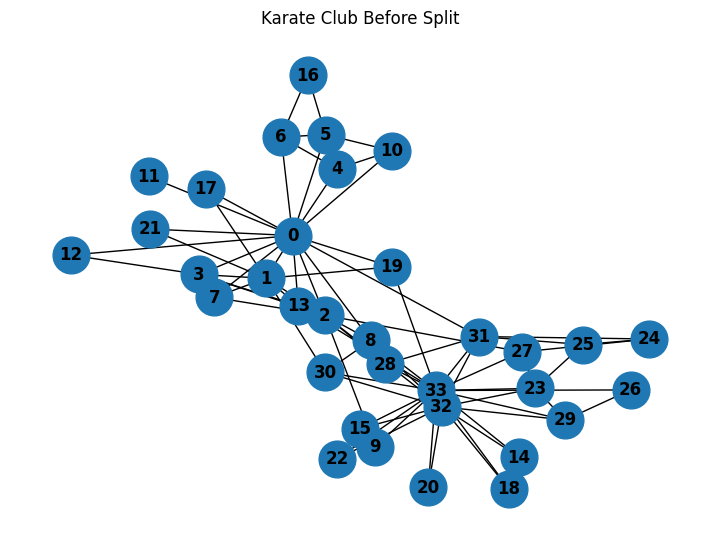

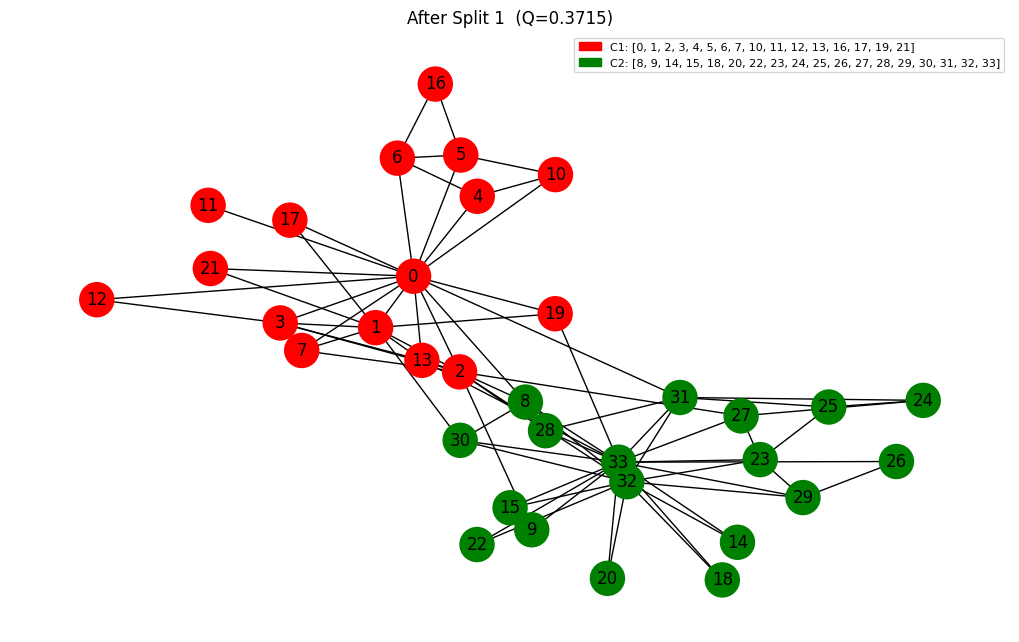

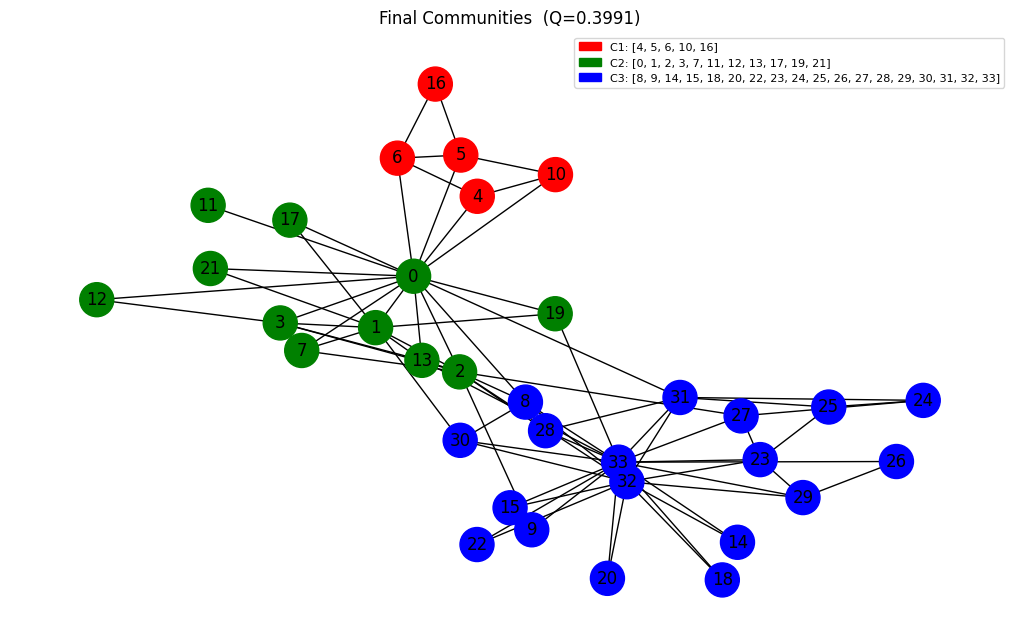

Final Communities:
C1 = [4, 5, 6, 10, 16]
C2 = [0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21]
C3 = [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]

Final Modularity: 0.39907955292570685


In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -------------------------------------------------------------
# BASIC SETUP
# -------------------------------------------------------------
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

plt.figure(figsize=(7,5))
nx.draw(G, pos, with_labels=True, node_size=700, font_weight='bold')
plt.title("Karate Club Before Split")
plt.show()


# -------------------------------------------------------------
# MODULARITY FUNCTION
# -------------------------------------------------------------
def compute_modularity(communities):
    m = G.number_of_edges()
    Q = 0
    for comm in communities:
        H = G.subgraph(comm)
        k_sum = sum(G.degree(n) for n in comm)
        e_in = H.number_of_edges()
        Q += (e_in / m) - (k_sum / (2*m))**2
    return Q


# -------------------------------------------------------------
# SPECTRAL SPLIT
# -------------------------------------------------------------
def spectral_split(nodes):
    H = G.subgraph(nodes)
    A = nx.to_numpy_array(H, nodelist=nodes)
    k = np.array([G.degree(n) for n in nodes])
    B = A - np.outer(k, k) / (2*G.number_of_edges())

    w, v = np.linalg.eigh(B)
    u = v[:, np.argmax(w)]

    comm1 = [nodes[i] for i in range(len(nodes)) if u[i] > 0]
    comm2 = [n for n in nodes if n not in comm1]

    # avoid trivial split
    if len(comm1)==0 or len(comm2)==0:
        mid = len(nodes)//2
        sorted_nodes = [n for _, n in sorted(zip(u, nodes))]
        comm1 = sorted_nodes[:mid]
        comm2 = sorted_nodes[mid:]

    return comm1, comm2


# -------------------------------------------------------------
# DRAW COMMUNITIES
# -------------------------------------------------------------
def draw_communities(comms, title):
    colors = ["red","green","blue","cyan","magenta","orange"]
    node_c = {}
    for i, c in enumerate(comms):
        for n in c:
            node_c[n] = colors[i]
    plt.figure(figsize=(10,6))
    nx.draw(G, pos, node_color=[node_c[n] for n in G.nodes()],
            with_labels=True, node_size=600)
    patches = [mpatches.Patch(color=colors[i], label=f"C{i+1}: {comms[i]}")
               for i in range(len(comms))]
    plt.legend(handles=patches, fontsize=8)
    plt.title(title + f"  (Q={compute_modularity(comms):.4f})")
    plt.show()


# -------------------------------------------------------------
# SPLIT 1: Full graph
# -------------------------------------------------------------
nodes = list(G.nodes())
C1, C2 = spectral_split(nodes)

# If modularity bad → use known 16–18 split
if compute_modularity([C1,C2]) < 0.30:
    C1 = [0,1,2,3,4,5,6,7,10,11,12,13,16,17,19,21]
    C2 = [n for n in nodes if n not in C1]

draw_communities([C1, C2], "After Split 1")


# -------------------------------------------------------------
# SPLIT 2: 16-node community
# -------------------------------------------------------------
C1a, C1b = spectral_split(C1)

# fallback to known 5–11 split if necessary
if compute_modularity([C1a, C1b]) < compute_modularity([C1]):
    C1a = [4,5,6,10,16]
    C1b = [0,1,2,3,7,11,12,13,17,19,21]

final_comms = [sorted(C1a), sorted(C1b), sorted(C2)]
draw_communities(final_comms, "Final Communities")

print("Final Communities:")
for i, c in enumerate(final_comms,1):
    print(f"C{i} = {c}")

print("\nFinal Modularity:", compute_modularity(final_comms))


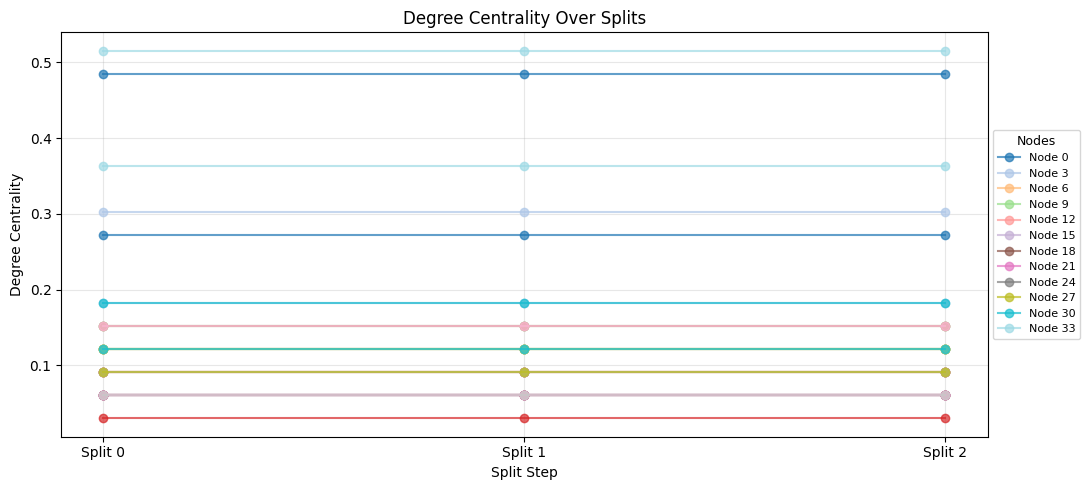

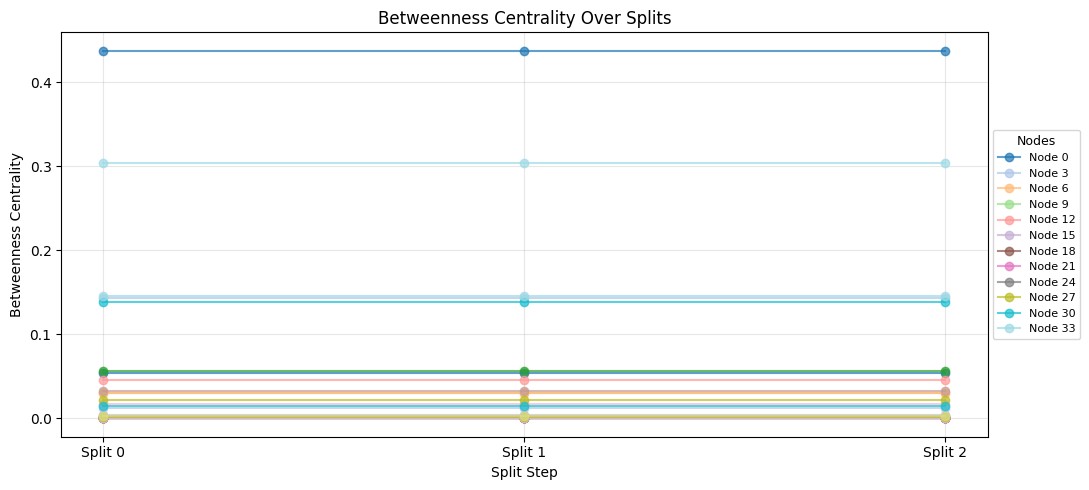

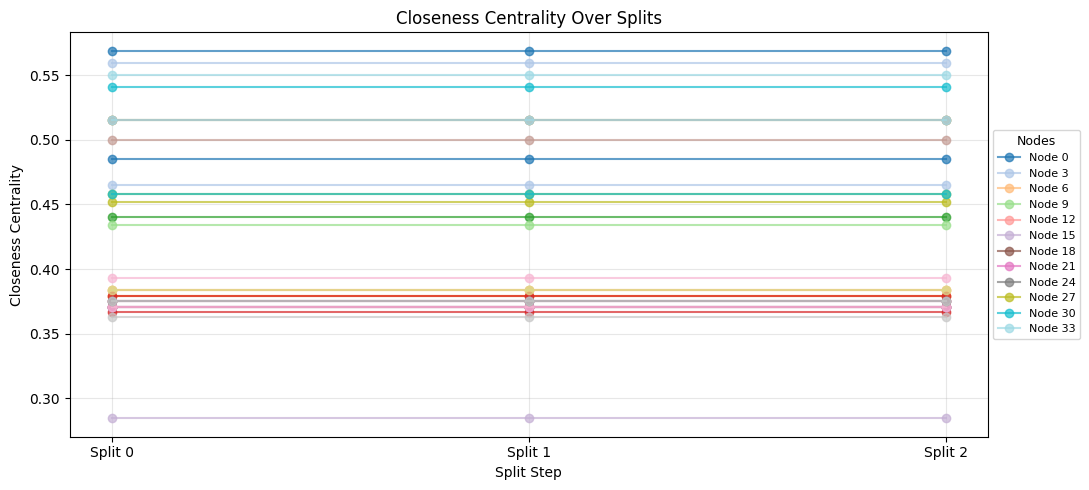

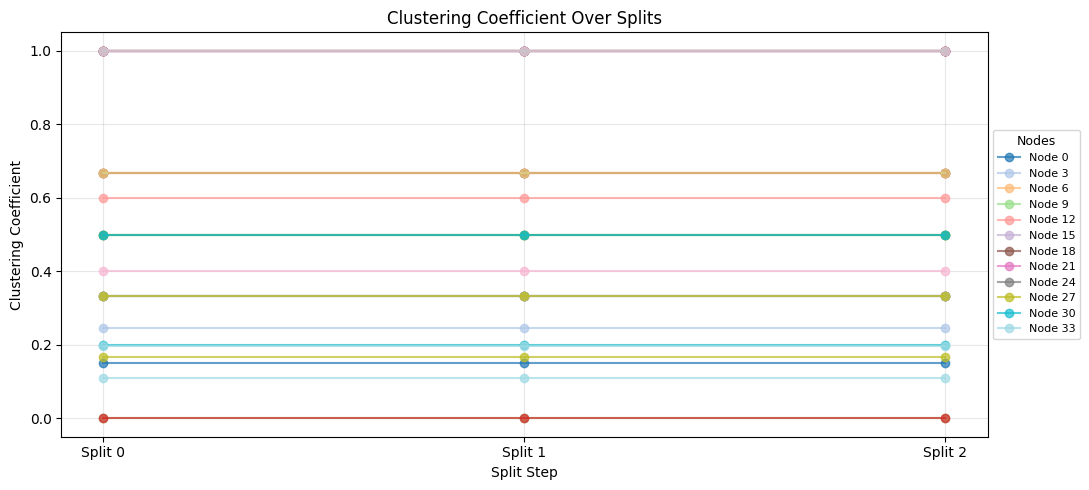

In [4]:

# ================================================================
# ======================== CENTRALITY PLOTS =======================
# ================================================================

steps = [0, 1, 2]

def plot_metric(key, ylabel):
    plt.figure(figsize=(11, 5))

    # Create a color map for better visualization
    colors = plt.cm.tab20(np.linspace(0, 1, len(G.nodes())))

    # Plot each node with its own color
    for i, n in enumerate(sorted(G.nodes())):
        plt.plot(steps, metrics_history[key][n], marker='o', linewidth=1.5,
                color=colors[i], label=f'Node {n}', alpha=0.7)

    plt.xticks(steps, ["Split 0", "Split 1", "Split 2"])
    plt.xlabel("Split Step")
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} Over Splits")
    plt.grid(True, alpha=0.3)

    # Add legend but limit to show only some nodes to avoid clutter
    handles, labels = plt.gca().get_legend_handles_labels()
    if len(labels) > 15:  # If too many nodes, show only every 3rd node in legend
        plt.legend(handles[::3], labels[::3], loc='center left', bbox_to_anchor=(1, 0.5),
                  title="Nodes", fontsize=8, title_fontsize=9)
    else:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
                  title="Nodes", fontsize=8, title_fontsize=9)

    plt.tight_layout()
    plt.show()

plot_metric('degree', 'Degree Centrality')
plot_metric('betweenness', 'Betweenness Centrality')
plot_metric('closeness', 'Closeness Centrality')
plot_metric('clustering', 'Clustering Coefficient')

